In [3]:
import numba as nb
import random
import math
import seaborn as sn
import matplotlib.pyplot as plt

In [17]:
def k_distrib(graph, scale='lin', colour='#40a6d1', alpha=.8, fit_line=False, expct_lo=1, expct_hi=10, expct_const=1):
    
    plt.close()
    num_nodes = graph.number_of_nodes()
    max_degree = 0
    
    # Calculate the maximum degree to know the range of x-axis
    for n in graph.nodes():
        if graph.degree(n) > max_degree:
            max_degree = graph.degree(n)
    
    # X-axis and y-axis values
    x = []
    y_tmp = []
    
    # Loop over all degrees until the maximum to compute the portion of nodes for that degree
    for i in range(max_degree + 1):
        x.append(i)
        y_tmp.append(0)
        for n in graph.nodes():
            if graph.degree(n) == i:
                y_tmp[i] += 1
        y = [i / num_nodes for i in y_tmp] 
    
    # Check for the lin / log parameter and set axes scale
    if scale == 'log':
        plt.xscale('log')
        plt.yscale('log')
        plt.title('Degree distribution (log-log scale)')
        plt.ylabel('log(P(k))')
        plt.xlabel('log(k)')
        plt.plot(x, y, linewidth = 0, marker = 'o', markersize = 8, color = colour, alpha = alpha)
        
        if fit_line:
            # Add theoretical distribution line k^-3
            # Note that you need to parametrize it manually
            w = [a for a in range(expct_lo,expct_hi)]
            z = []
            for i in w:
                x = (i**-3) * expct_const # set line's length and fit intercept
                z.append(x)

            plt.plot(w, z, 'k-', color='#7f7f7f')
            
    else:
        plt.plot(x, y, linewidth = 0, marker = 'o', markersize = 8, color = colour, alpha = alpha)
        plt.title('Degree distribution (linear scale)')
        plt.ylabel('P(k)')
        plt.xlabel('k')

    plt.show()

In [39]:
import random
import networkx as nx

def Barabasi(group1, group2, edges, percentage):
    '''
    Making a scale-free network properties when you have two groups

    group1: Takes as input a list of nodes
    group2: Takes as input a list of nodes

    edges: int amount of edges your network has

    percentage: float between 0 and 100 
    '''
  

    # Algorithms that produce scale-free network properties when you have two groups


    bin_ = random.sample(group1, k = math.ceil(len(group1)*(percentage/100)))

        
    edge_list = []

    for _ in range(edges):
        
        group2_node = random.choice(group2)
  

        chosen_node = random.choice(bin_)
        bin_.append(chosen_node)

        bin_.append(random.choice(group1))
        

        edge = tuple([group2_node, chosen_node])
        edge_list.append(edge)


    return edge_list




In [35]:
group1 = random.sample(range(1, 100000), 10000)
group2 = random.sample(range(100000, 200000), 10000)

edges = 40000
percentage  = 1

edgelist = Barabasi(group1, group2, edges, percentage)

# print(edgelist)
H = nx.Graph(edgelist)

In [36]:
l_degrees = [ i[1] for i in H.degree()]

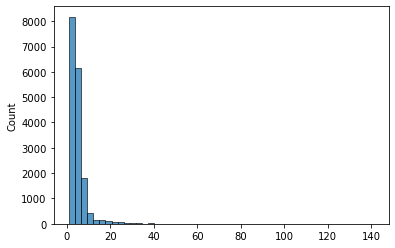

In [37]:
sn.histplot(data=l_degrees, bins = 50)
plt.show()




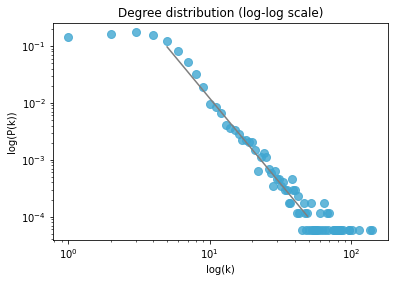

In [38]:
k_distrib(graph=H, colour='#40a6d1', scale='log', alpha=.8, fit_line=True, expct_lo=5, expct_hi=50, expct_const=12)